# Data Analysis On NYC Payroll

## Problem
1) My manager(pretend) wants to know the total payroll number for 2022.
2) Which borough has the highest payroll?

## Data
The following data is from the NYC Open Data. 

In this analysis we will do a deep dive in the income level of the CityWide Payroll.

Link: https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e

Since the data is open sourced and public, we can assume there is no bias in our data. 

## Process
We will use an API to get the data we need to analyze. 


I used a API given by the NYC Open Data to load the data in.

In [19]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
import numpy as np
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 1,000,000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("k397-673e", limit=1000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

Data Cleaning

In [20]:
#I listed all the columns in the dataframe
list(results_df.columns)

['fiscal_year',
 'payroll_number',
 'agency_name',
 'last_name',
 'first_name',
 'agency_start_date',
 'work_location_borough',
 'title_description',
 'leave_status_as_of_july_31',
 'base_salary',
 'pay_basis',
 'regular_hours',
 'regular_gross_paid',
 'ot_hours',
 'total_ot_paid',
 'total_other_pay',
 'mid_init']

In [21]:
#Use the head function to look at the first 5 rows
results_df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,mid_init
0,2022,67,ADMIN FOR CHILDREN'S SVCS,ZWEIGENHAFT,BLIMI,2021-05-10T00:00:00.000,BROOKLYN,AGENCY ATTORNEY INTERNE,ON LEAVE,71757.00,per Annum,994.00,38807.66,0.00,0.00,49.50,NaN
1,2022,67,ADMIN FOR CHILDREN'S SVCS,AARON,TERESA,2016-03-21T00:00:00.000,BRONX,CHILD PROTECTIVE SPECIALIST,ACTIVE,60327.00,per Annum,1820.00,60161.66,590.00,27527.82,5600.65,NaN
2,2022,67,ADMIN FOR CHILDREN'S SVCS,AARONS,CAMELIA,2016-08-08T00:00:00.000,BROOKLYN,CHILD PROTECTIVE SPECIALIST,ACTIVE,60327.00,per Annum,1820.00,60161.66,138.50,5145.70,3008.34,M
3,2022,67,ADMIN FOR CHILDREN'S SVCS,ABDIN,MOHAMMED,2022-05-23T00:00:00.000,QUEENS,CHILD PROTECTIVE SPECIALIST,ACTIVE,50757.00,per Annum,-70.00,132.69,0.00,0.00,-152.53,N
4,2022,67,ADMIN FOR CHILDREN'S SVCS,ABDUL-AZIZ,SALIH,2021-04-26T00:00:00.000,QUEENS,YOUTH DEVELOPMENT SPECIALIST,CEASED,45759.00,per Annum,0.00,-2833.27,0.00,0.00,0.00,A


In [22]:
#Looked to see if there are any missing values in the Dataframe
missing_values_count = results_df.isnull().sum()
print(missing_values_count)

fiscal_year                        0
payroll_number                328705
agency_name                        0
last_name                        345
first_name                       347
agency_start_date                 63
work_location_borough          96046
title_description                 20
leave_status_as_of_july_31         0
base_salary                        0
pay_basis                          0
regular_hours                      0
regular_gross_paid                 0
ot_hours                           0
total_ot_paid                      0
total_other_pay                    0
mid_init                      497387
dtype: int64


In [23]:
#Show the Shape of the DataFrame
results_df.shape

(1000000, 17)

In [24]:
#After looking at the columns and the null values, I noticed the column "mid_init" has alot of null values.
#This makes sense since it is common to not have a middle name.
#So i dropped the column
results_df = results_df.drop(columns = ["mid_init"])

In [25]:
#Resulting shape of the DataFrame
results_df.shape

(1000000, 16)

In [26]:
#Looked for more null values
results_df.isnull().sum()

fiscal_year                        0
payroll_number                328705
agency_name                        0
last_name                        345
first_name                       347
agency_start_date                 63
work_location_borough          96046
title_description                 20
leave_status_as_of_july_31         0
base_salary                        0
pay_basis                          0
regular_hours                      0
regular_gross_paid                 0
ot_hours                           0
total_ot_paid                      0
total_other_pay                    0
dtype: int64

In [27]:
#I dropped the remaining null values
results_df = results_df.dropna()

In [28]:
#Again the shape of the dataframe
#The sample got smaller but there is still over 500 thousand records
results_df.shape

(574892, 16)

In [29]:
#Last check for nulls
results_df.isnull().sum()

fiscal_year                   0
payroll_number                0
agency_name                   0
last_name                     0
first_name                    0
agency_start_date             0
work_location_borough         0
title_description             0
leave_status_as_of_july_31    0
base_salary                   0
pay_basis                     0
regular_hours                 0
regular_gross_paid            0
ot_hours                      0
total_ot_paid                 0
total_other_pay               0
dtype: int64

In [30]:
#Checking our Datatypes
results_df.dtypes

fiscal_year                   object
payroll_number                object
agency_name                   object
last_name                     object
first_name                    object
agency_start_date             object
work_location_borough         object
title_description             object
leave_status_as_of_july_31    object
base_salary                   object
pay_basis                     object
regular_hours                 object
regular_gross_paid            object
ot_hours                      object
total_ot_paid                 object
total_other_pay               object
dtype: object

In [31]:
#Our datatypes are not correct. 
#They are all srting values.
#Lets correct some using the website as a guide.
data_types_dict = {"fiscal_year": int,
                   "payroll_number": int,
                   "agency_start_date": "datetime64[ns]",
                   "base_salary": float,
                   "regular_hours": float,
                   "regular_gross_paid": float,
                   "ot_hours": float,
                   "total_ot_paid": float,
                   "total_other_pay": float}

results_df = results_df.astype(data_types_dict)

In [ ]:
#Turn into csv file
final_df.to_csv('NYC_Payroll.csv', index=False)

# Analyze
Here we will analyze our data using seaborn and other libraries in python. 

In [35]:
#Data Visualization

#Import Matplotlib
import matplotlib.pyplot as plt

#import Seaborn
import seaborn as sns

[Text(0.5, 1.0, 'Base Salary for Each Work Location')]

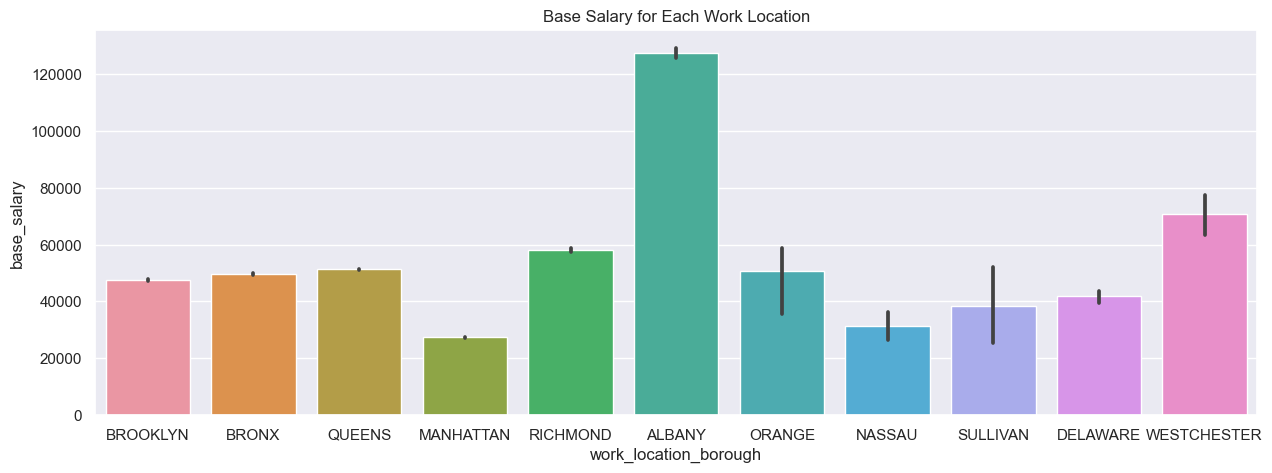

In [37]:
sns.set(rc={'figure.figsize':(15,5)})

sns.barplot(data = final_df, x = "work_location_borough", y = "base_salary").set(title = "Base Salary for Each Work Location")

In [39]:
#I want to find all the unique values in the borough
print(results_df["work_location_borough"].unique())

['BROOKLYN' 'BRONX' 'QUEENS' 'MANHATTAN' 'RICHMOND' 'ALBANY' 'ORANGE'
 'NASSAU' 'SULLIVAN' 'DELAWARE' 'WESTCHESTER']


Since I only want to focus on Brooklyn, Bronx, Queens, Manhattan and richmond(staten island).
I will drop all rows excluding NYC

In [78]:
for row in results_df.rows:
    if results_df["work_location_borough"] != "Brooklyn":
        drop.row

AttributeError: 'NoneType' object has no attribute 'rows'